## Problem 3
### Paradoxes in Multi Modal Fixed Demand Network (4)
Lecture note 17, page 18-19

In [59]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Two-link Network

2-link network:


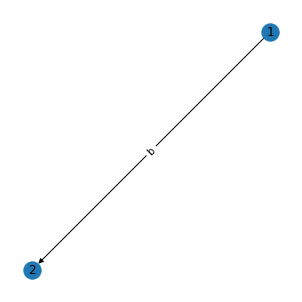

In [60]:
nodes={1:(1,1),2:(0,0)}
links={'a':(1,2),'b':(1,2)}
# Create the network based on networkx
G=nx.DiGraph()
# Add nodes
for node in nodes.items():
    G.add_node(node[0],pos=node[1])
# Add edges
for i in links.keys():
    G.add_edge(links[i][0],links[i][1],link=i)
# Plot the network
pos=nx.get_node_attributes(G,'pos') # The positions of each node
link_index=nx.get_edge_attributes(G,'link') # The edge index
plt.figure(figsize=(4,4))
nx.draw(G, pos, node_size=300, with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=link_index) # Draw the edge labels
print('2-link network:')

In [61]:
# Link travel time function
t_a_1 = lambda x: x+5
t_b_1 = lambda x: x+5
t_a_2 = lambda x: x+10
t_b_2 = lambda x: x+5

# Emission factor
h_a_1 = 0.2
h_b_1 = 0.2
h_a_2 = 0.4
h_b_2 = 0.1

# Demand
q_1 = 10
q_2 = 5

In [62]:
guess = (1,1,1,1)
f = lambda xa1,xb1,xa2,xb2: np.array([
    xa1+xb1-q_1,
    xa2+xb2-q_2,
    t_a_1(xa1) - t_b_1(xb1),
    t_a_2(xa2) - t_b_2(xb2)
])
[xa1,xb1,xa2,xb2]=opt.least_squares(lambda x: f(x[0],x[1],x[2],x[3]),x0=guess).x

In [63]:
print('The equilibrium flow of model 1 on link a and b is respectively:', 
np.round(xa1,1), 'and', np.round(xb1,1))
print('The equilibrium flow of model 2 on link a and b is respectively:', 
np.round(xa2,1), 'and', np.round(xb2,1))
print('The equilibrium paths time is:', np.round(t_a_1(xa1),1))
print('The total emissions are:', np.round(h_a_1*xa1+h_a_2*xa2+h_b_1*xb1+h_b_2*xb2,1))

The equilibrium flow of model 1 on link a and b is respectively: 5.0 and 5.0
The equilibrium flow of model 2 on link a and b is respectively: -0.0 and 5.0
The equilibrium paths time is: 10.0
The total emissions are: 2.5


Modal Shift

In [64]:
# Demand
q_1 = 7.5
q_2 = 7.5

In [65]:
guess = (1,1,1,1)
f = lambda xa1,xb1,xa2,xb2: np.array([
    xa1+xb1-q_1,
    xa2+xb2-q_2,
    t_a_1(xa1) - t_b_1(xb1),
    t_a_2(xa2) - t_b_2(xb2)
])
[xa1,xb1,xa2,xb2]=opt.least_squares(lambda x: f(x[0],x[1],x[2],x[3]),x0=guess).x

In [66]:
print('The equilibrium flow of model 1 on link a and b is respectively:', 
np.round(xa1,2), 'and', np.round(xb1,2))
print('The equilibrium flow of model 2 on link a and b is respectively:', 
np.round(xa2,2), 'and', np.round(xb2,2))
print('The equilibrium paths time for mode 1 and 2 is respectively:', 
np.round(t_a_1(xa1),2), 'and', np.round(t_a_2(xa2),2))
print('The total emissions are:', np.round(h_a_1*xa1+h_a_2*xa2+h_b_1*xb1+h_b_2*xb2,3))

The equilibrium flow of model 1 on link a and b is respectively: 3.75 and 3.75
The equilibrium flow of model 2 on link a and b is respectively: 1.25 and 6.25
The equilibrium paths time for mode 1 and 2 is respectively: 8.75 and 11.25
The total emissions are: 2.625
